<a href="https://colab.research.google.com/github/PHAMTHIMINHTHUY/hse_culture_python/blob/master/PHAMTHIMINHTHUY_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MUSIC LISTENING STATISTICS ON ARTIST LY TRANG'S ALBUM

* Ly Trang is a young artist. She has been active on Sportify since 2018. She released an album on Sportify called "Snail Skeleton" and a live concert collab with two other artists.The genre music that Ly Trang is pursuing is experimental pop and art pop. The songs she creates always have a good effect on the listener, although she is a young artist, Ly Trang also has a certain community of listeners.

* So today I want to use the pandas library to analyze the statistics on Ly Trang's album (statistics are from the date 21/09/2021 to 18/10/2021 on Sportify)

In [ ]:
#First we need to import pandas and numpy to be able to use them.
import pandas as pd
import numpy as np

# Read TSV file using Pandas library

In [ ]:
#To read a file .csv i use the "read_csv".
#And will be returned a dataframe.
df = pd.read_csv("audience.tsv",sep = "\t")

In [ ]:
#Then printed out the first record of the dataframe 
#And I used the "head".
df.head()

,DAYS,LISTENERS,STREAMS,FOLLOWERS
0,21-Sep,2,2,76
1,22-Sep,2,14,76
2,23-Sep,1,1,76
3,24-Sep,2,2,76
4,25-Sep,6,17,76


In [ ]:
# Then I view the dataframe's size using the "shape"
df.shape

(28, 4)

In [ ]:
#Then I view the dataframe's information using the "info"
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   DAYS       28 non-null     object
 1   LISTENERS  28 non-null     int64 
 2   STREAMS    28 non-null     int64 
 3   FOLLOWERS  28 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 1.0+ KB


In [ ]:
#print all the columns' name
list(df.columns)

['DAYS', 'LISTENERS', 'STREAMS', 'FOLLOWERS']

In [ ]:
#print all indexing in the datafame
df.index

RangeIndex(start=0, stop=28, step=1)

In [ ]:
#print basic statistics on data
df.describe()

,LISTENERS,STREAMS,FOLLOWERS
count,28.000000,28.000000,28.000000
mean,4.035714,8.642857,81.857143
std,3.225846,7.469515,4.584307
min,1.000000,1.000000,76.000000
25%,2.000000,3.000000,77.750000
50%,3.000000,6.000000,81.500000
75%,5.000000,14.000000,87.000000
max,18.000000,28.000000,88.000000


In [ ]:
df.describe(include="all")

,DAYS,LISTENERS,STREAMS,FOLLOWERS
count,28,28.000000,28.000000,28.000000
unique,28,NaN,NaN,NaN
top,14-Oct,NaN,NaN,NaN
freq,1,NaN,NaN,NaN
mean,NaN,4.035714,8.642857,81.857143
std,NaN,3.225846,7.469515,4.584307
min,NaN,1.000000,1.000000,76.000000
25%,NaN,2.000000,3.000000,77.750000
50%,NaN,3.000000,6.000000,81.500000
75%,NaN,5.000000,14.000000,87.000000


# LOC VS ILOC

In [ ]:
# Reprint the dataset again
df.head()

,DAYS,LISTENERS,STREAMS,FOLLOWERS
0,21-Sep,2,2,76
1,22-Sep,2,14,76
2,23-Sep,1,1,76
3,24-Sep,2,2,76
4,25-Sep,6,17,76


In [ ]:
#Select values in the Listeners row that are worth 6
df.loc[(df['LISTENERS']  == 6)]

,DAYS,LISTENERS,STREAMS,FOLLOWERS
4,25-Sep,6,17,76
23,14-Oct,6,7,87


In [ ]:
#print value in row 23
df.iloc[[23]]

,DAYS,LISTENERS,STREAMS,FOLLOWERS
23,14-Oct,6,7,87


In [ ]:
# print value from row 12 to row 23
df.iloc[12:24]

,DAYS,LISTENERS,STREAMS,FOLLOWERS
12,03-Oct,2,2,81
13,04-Oct,4,5,81
14,05-Oct,2,4,82
15,06-Oct,3,14,82
16,07-Oct,3,5,82
17,08-Oct,18,23,82
18,09-Oct,7,28,86
19,10-Oct,7,8,87
20,11-Oct,5,6,87
21,12-Oct,5,9,87


# Group By

In [ ]:
group_df= df[["DAYS","FOLLOWERS"]] 
group_df

,DAYS,FOLLOWERS
0,21-Sep,76
1,22-Sep,76
2,23-Sep,76
3,24-Sep,76
4,25-Sep,76
5,26-Sep,77
6,27-Sep,77
7,28-Sep,78
8,29-Sep,78
9,30-Sep,79


In [ ]:
group_df=group_df.groupby("FOLLOWERS").size()
group_df

FOLLOWERS
76    5
77    2
78    2
79    2
81    3
82    4
86    1
87    5
88    4
dtype: int64

array([<AxesSubplot:ylabel='None'>], dtype=object)

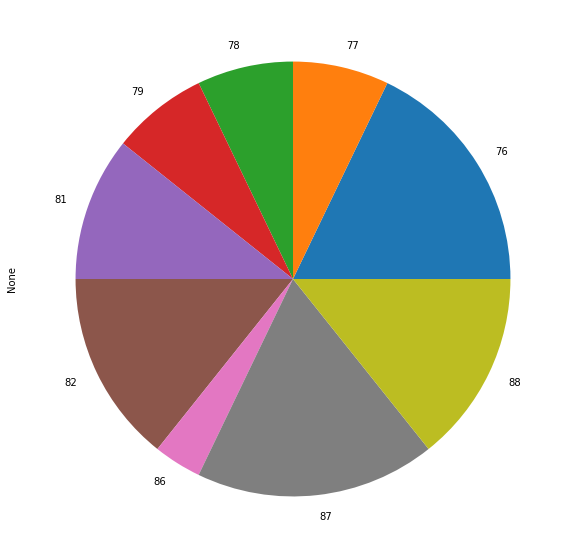

In [ ]:
group_df.plot.pie(subplots=True,figsize=(10,10))

<AxesSubplot:>

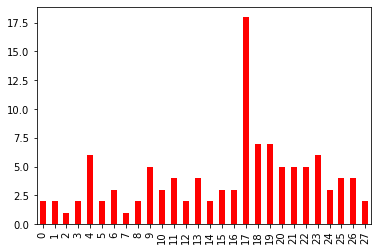

In [ ]:
df["LISTENERS"].plot.bar(color="red")

In [ ]:
X = df.iloc[3:5,:-1]
Y= df.iloc[3:5,-1]
print(Y)

3    76
4    76
Name: FOLLOWERS, dtype: int64


In [ ]:
#Count the most followers in the last 28 days,
# and rank them in descending order.
c = df.groupby("DAYS")["FOLLOWERS"].sum()
c.sort_values(ascending = False).head(5)

DAYS
15-Oct    88
18-Oct    88
16-Oct    88
17-Oct    88
10-Oct    87
Name: FOLLOWERS, dtype: int64

In [ ]:
#unique value
df.FOLLOWERS.value_counts().count()

9

In [ ]:
#calculate how much followers changes increase in total
df.FOLLOWERS.nunique()

9